In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing required packages
import re
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../data/cyberbullying_tweets.csv')

# printing the shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(47692, 2)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

tweet_text cyberbullying_type
6097   @twothug4u educate yourself on oppression. htt...  not_cyberbullying
41477  When was the last time a white person called a...          ethnicity
18939  I Went All The Way To Islam And Said No Jesus ...           religion
16817  @harmlesstree2 @MaxBlumenthal It is an obvious...           religion
33241  god bless Facebook... nice to see that the gir...                age

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


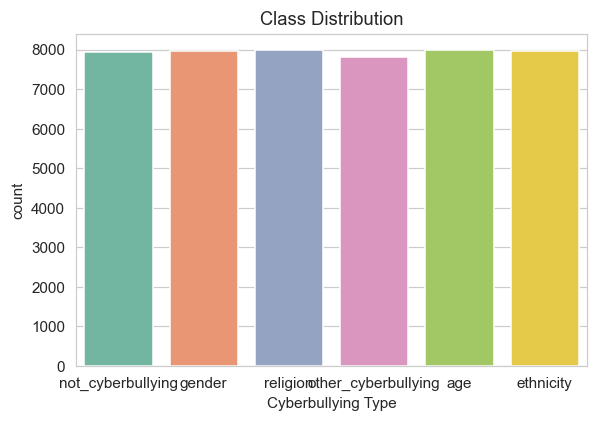

In [4]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# plotting the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [5]:
# counting null values in the dataset
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
# splitting into train-test sets (70-30)
# performing a random split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# rest index
df_train.reset_index()
df_test.reset_index()

# size of train vs test
print(df_train.shape, 'vs', df_test.shape)

# class distribution of train set
display(df_train['cyberbullying_type'].value_counts())

# class distribution of test set
display(df_test['cyberbullying_type'].value_counts())

df_test.to_csv('../data/test_data.csv', index=False)

(33384, 2) vs (14308, 2)


religion               5657
age                    5643
gender                 5630
ethnicity              5543
not_cyberbullying      5479
other_cyberbullying    5432
Name: cyberbullying_type, dtype: int64

not_cyberbullying      2466
ethnicity              2418
other_cyberbullying    2391
age                    2349
gender                 2343
religion               2341
Name: cyberbullying_type, dtype: int64

In [7]:
# spawning a word lemmatizer
lemma = WordNetLemmatizer()

# loading all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
## defining the cleaning and preprocessing actions
# converting text to lowercase
# removing links
# coverting text into tokens
# removing stop words
# lemmatizing all words
# removing all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [9]:
# cleaning and preprocessing the tweet_text column
df_train['clean_tweet'] = df['tweet_text'].apply(clean_text)

display(df_train.loc[:,['tweet_text', 'clean_tweet']].head())

tweet_text  \
12276  @MarleyGotBoobs gays r not the sissi's st8 men...   
17518  Newsflash....that Evilanglist....is not a Chri...   
4127   @ncweaver I've ran into difficulties getting t...   
19027  It's not about satire or free speech.  Pretend...   
23449  You know who historically burned books Nazi an...   

                                             clean_tweet  
12276  marleygotboobs gay sissi men run prison rape g...  
17518  newsflash evilanglist christian deplorable rad...  
4127   ncweaver ran difficulty getting respond weird ...  
19027  satire free speech pretending solve nothing pr...  
23449  know historically burned book nazi radical chr...

# To do:
1. Binary encode the class labels: cyberbullying_type
2. Convert clean_tweet to vector notations
3. Save as train.csv

## WordCloud: Not cyberbullying tweets
----

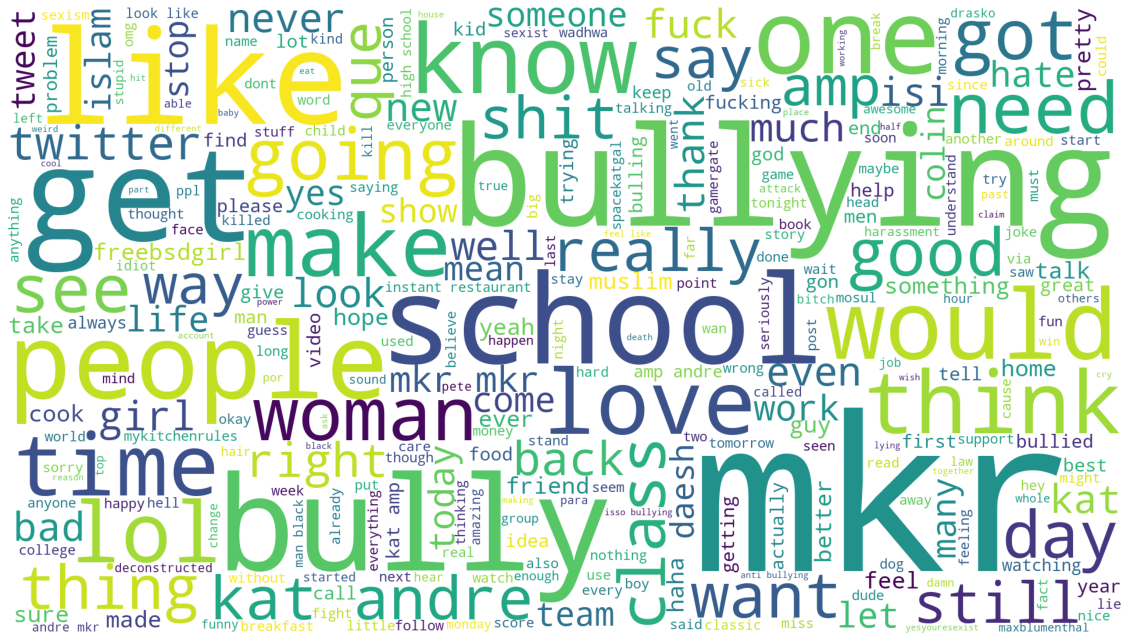

In [10]:
# wordcloud for not_cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: All cyberbullying tweets
----

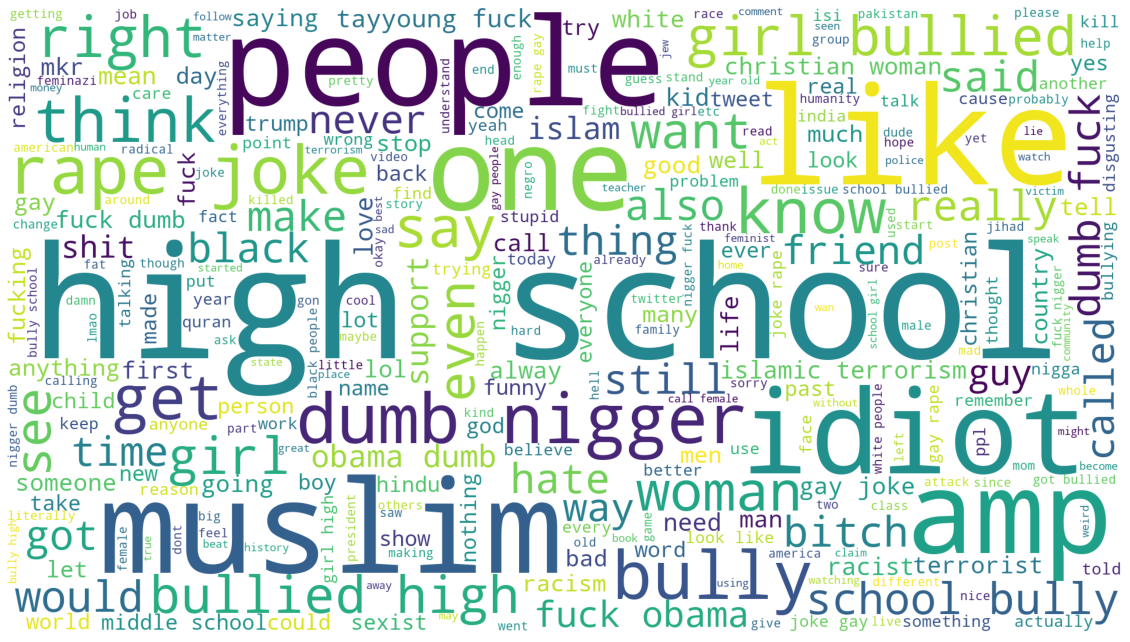

In [11]:
# wordcloud for all cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] != 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Age cyberbullying tweets
----

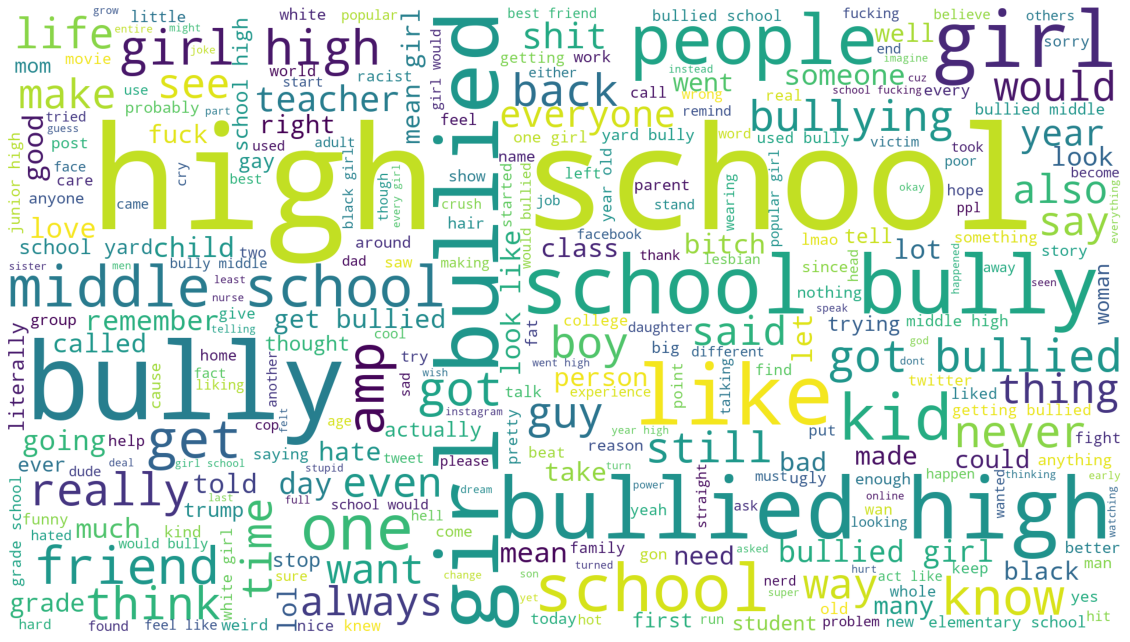

In [12]:
# wordcloud for age cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'age'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Ethnicity cyberbullying tweets
----

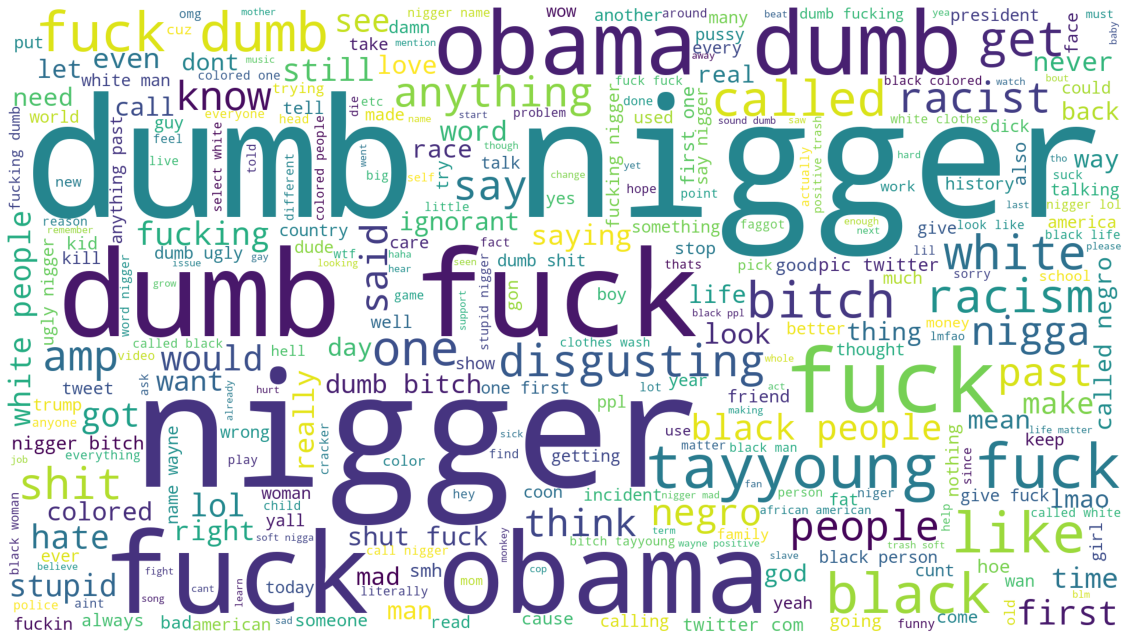

In [13]:
# wordcloud for ethnicity cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'ethnicity'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Gender cyberbullying tweets
----

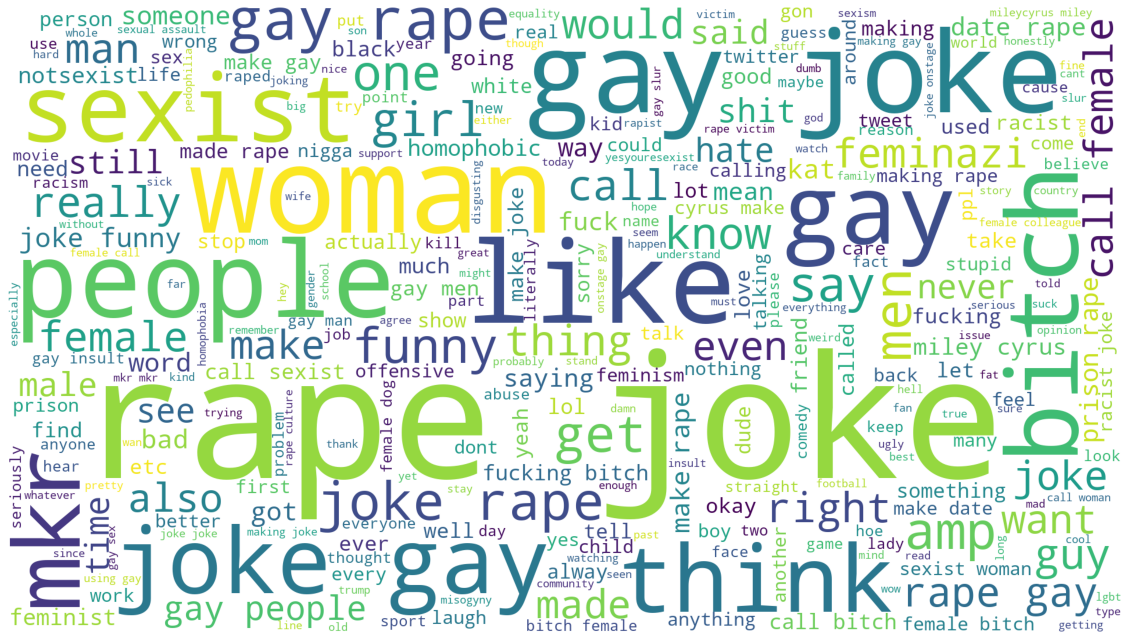

In [14]:
# wordcloud for gender cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'gender'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Religion cyberbullying tweets
----

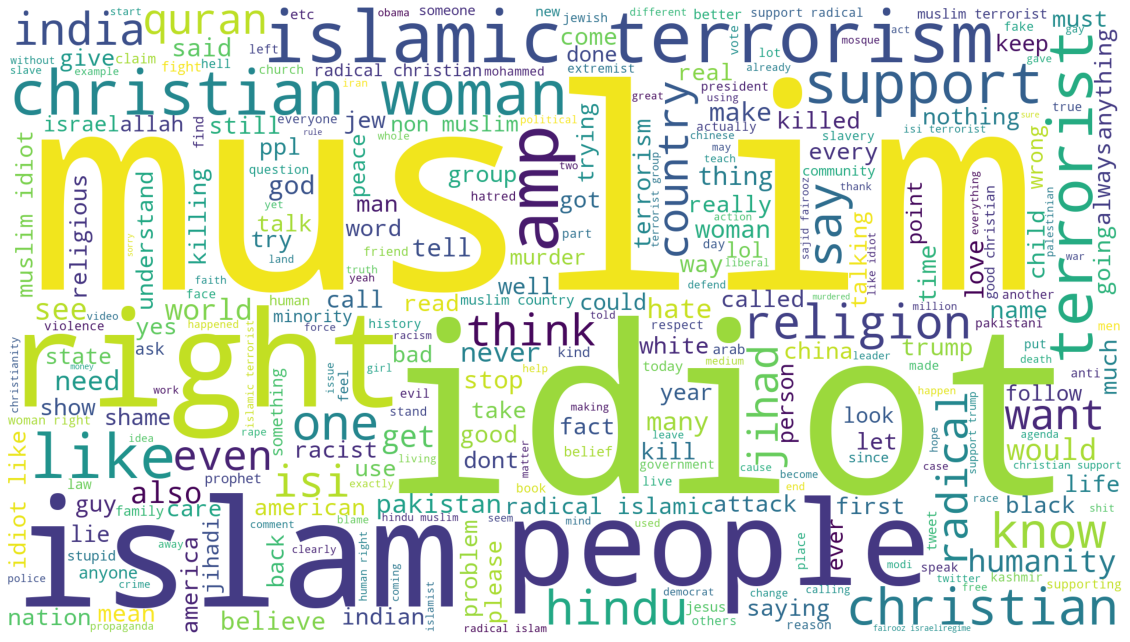

In [15]:
# wordcloud for religion cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'religion'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Other cyberbullying tweets
----

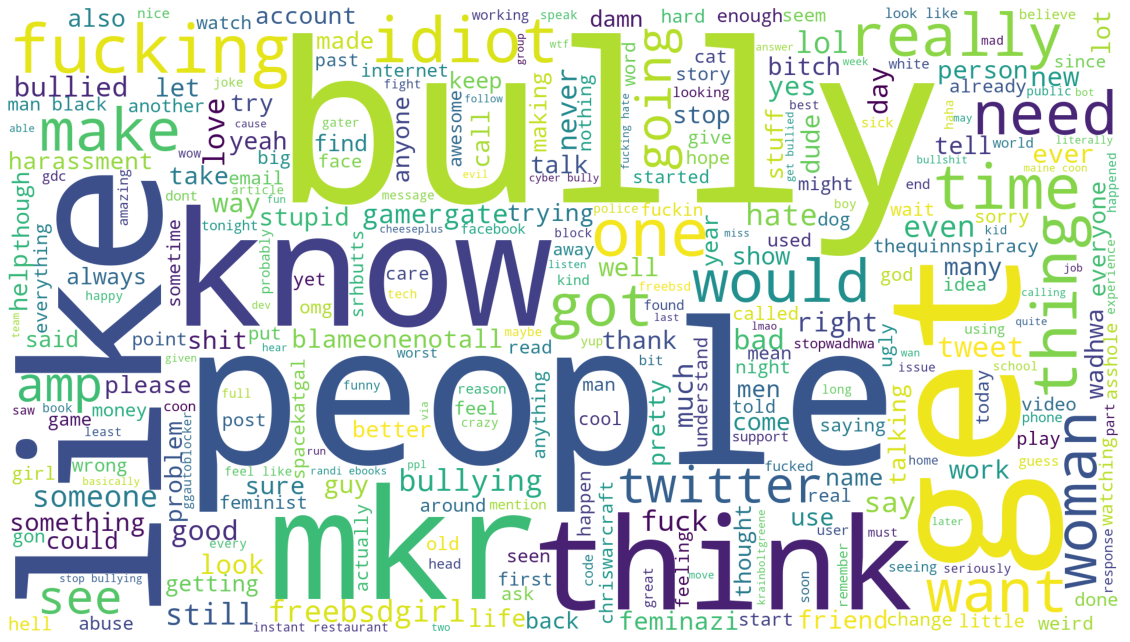

In [16]:
# wordcloud for other cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'other_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()